# **파이썬 데이터 분석 프로젝트 - 2023 KBO 정규시즌 실제 순위와 지표별 WAR(대체선수 대비 승리기여)의 상관관계**

In [3]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



## **2023시즌 KBO 팀별 타격 WAR, 투구 WAR, 수비 WAA**

In [7]:
team_piching_path = './투구.csv'
team_batting_path = './타격.csv'
team_defence_path = './수비.csv'


pich_war = pd.read_csv(team_piching_path)
bat_war = pd.read_csv(team_batting_path)
def_war = pd.read_csv(team_defence_path)

print(pich_war.columns)
print(bat_war.columns)
print(def_war.columns)

Index(['순위', '팀명', 'WAR'], dtype='object')
Index(['순위', '팀명', 'WAR'], dtype='object')
Index(['순위', '팀명', 'WAAwithADJ'], dtype='object')


## **2023 최종 팀 순위**

In [12]:
team_rank_path = './팀순위.csv'

team_rank = pd.read_csv(team_rank_path)
print(team_rank)

   최종순위   팀명
0     1   LG
1     2   KT
2     3  SSG
3     4   NC
4     5   두산
5     6  KIA
6     7   롯데
7     8   삼성
8     9   한화
9    10   키움


## 각 데이터 시각화

<BarContainer object of 10 artists>

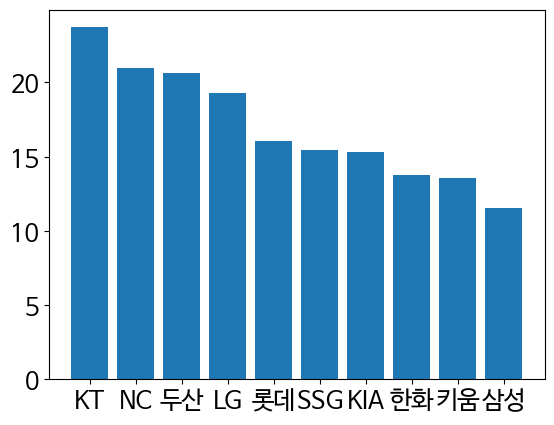

In [9]:
plt.bar(pich_war['팀명'],pich_war['WAR'])

<BarContainer object of 10 artists>

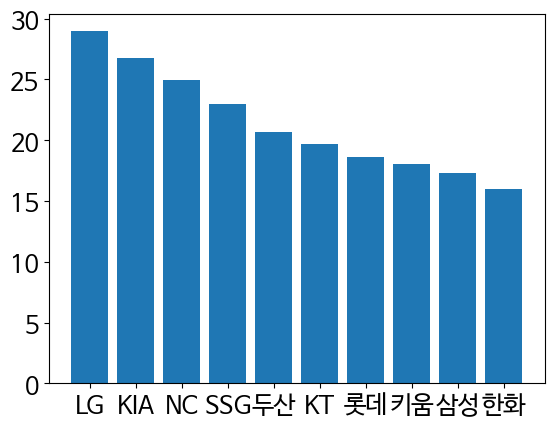

In [10]:
plt.bar(bat_war['팀명'],bat_war['WAR'])

<BarContainer object of 10 artists>

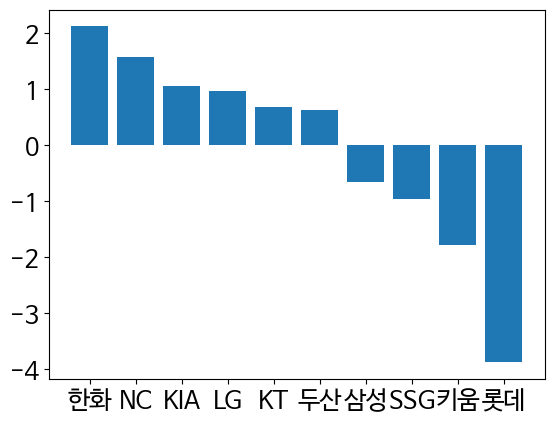

In [11]:
plt.bar(def_war['팀명'],def_war['WAAwithADJ'])

## 투구 순위와 최종순위 데이터 병합

In [16]:
pich_rank = pd.merge(pich_war,team_rank,how='inner',on='팀명')
print(pich_rank)

   순위   팀명    WAR  최종순위
0   1   KT  23.72     2
1   2   NC  20.96     4
2   3   두산  20.66     5
3   4   LG  19.27     1
4   5   롯데  16.06     7
5   6  SSG  15.45     3
6   7  KIA  15.31     6
7   8   한화  13.75     9
8   9   키움  13.53    10
9  10   삼성  11.55     8


## 투구 순위와 최종 순위 상관도 분석

In [21]:
pich_corr = pich_rank['순위'].corr(pich_rank['최종순위'])
print(pich_corr)

0.7696969696969697


## 타격 순위와 최종순위 데이터 병합

In [22]:
bat_rank = pd.merge(bat_war,team_rank,how='inner',on='팀명')
print(bat_rank)

   순위   팀명    WAR  최종순위
0   1   LG  28.96     1
1   2  KIA  26.74     6
2   3   NC  24.97     4
3   4  SSG  22.98     3
4   5   두산  20.65     5
5   6   KT  19.65     2
6   7   롯데  18.58     7
7   8   키움  18.08    10
8   9   삼성  17.32     8
9  10   한화  15.97     9


## 타격 순위와 최종순위 상관도 분석

In [23]:
bat_corr = bat_rank['순위'].corr(bat_rank['최종순위'])
print(bat_corr)

0.7575757575757575


## 수비 순위와 최종순위 데이터 병합

In [24]:
def_rank = pd.merge(def_war,team_rank,how='inner',on='팀명')
print(def_rank)

   순위   팀명  WAAwithADJ  최종순위
0   1   한화       2.116     9
1   2   NC       1.566     4
2   3  KIA       1.045     6
3   4   LG       0.969     1
4   5   KT       0.686     2
5   6   두산       0.624     5
6   7   삼성      -0.658     8
7   8  SSG      -0.959     3
8   9   키움      -1.789    10
9  10   롯데      -3.880     7


## 수비 순위와 최종 순위 상관도 분석

In [25]:
def_corr = def_rank['순위'].corr(def_rank['최종순위'])
print(def_corr)

0.19999999999999998


## 그래프로 표시

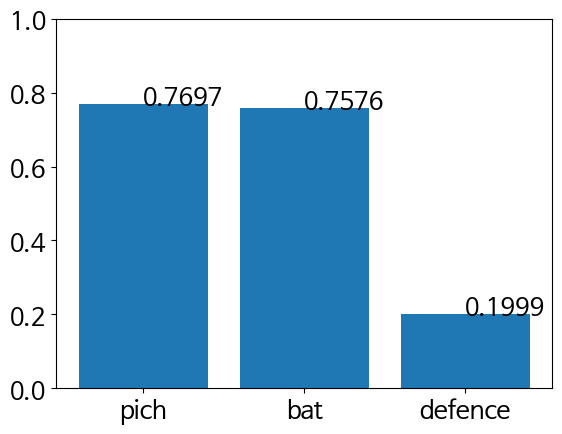

In [34]:
x=['pich','bat','defence']
corr=[pich_corr,bat_corr,def_corr]

plt.bar(x,corr)
plt.ylim(0,1)
plt.text(0,pich_corr,'0.7697')
plt.text(1,bat_corr,'0.7576')
plt.text(2,def_corr,'0.1999')
plt.show()

In [ ]:
sns.pairplot()

# **결론 : 프로야구 최종순위에 가장 강한 영향을 끼치는 지표는 투구지표이다.**